In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./Mall_Customers.csv',encoding = "ISO-8859-1",delimiter=',')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df=df.drop("CustomerID", axis=1)

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


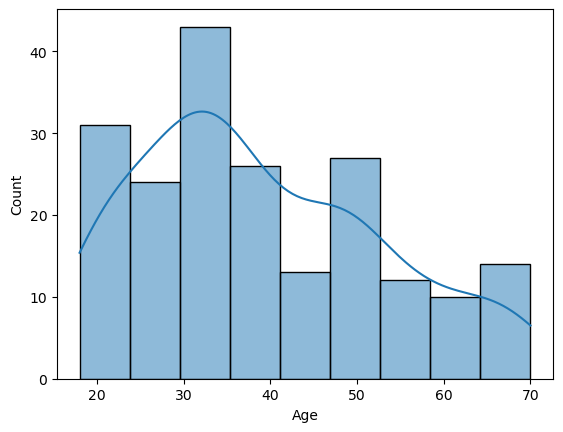

In [11]:
sns.histplot(df["Age"], kde=True)
plt.show()

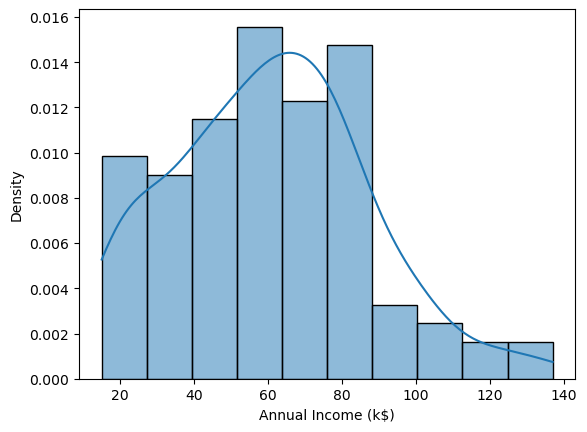

In [12]:
sns.histplot(df["Annual Income (k$)"], kde=True, stat="density")
plt.show()

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

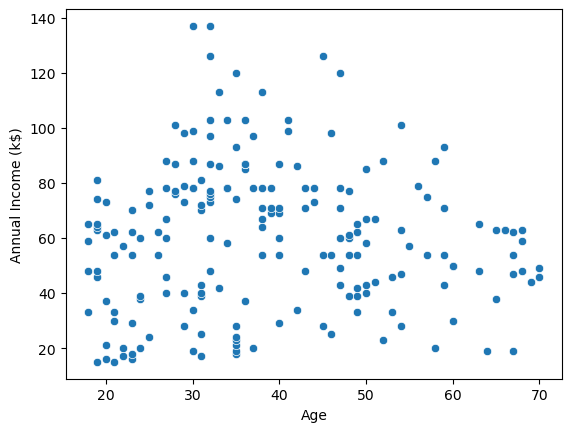

In [13]:
sns.scatterplot(data=df,x="Age",y="Annual Income (k$)")

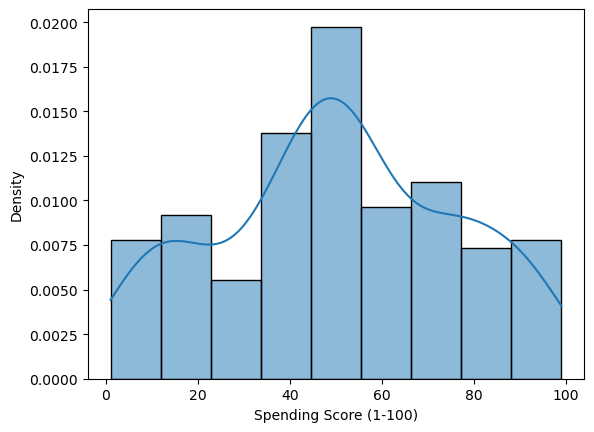

In [14]:
sns.histplot(df["Spending Score (1-100)"], kde=True, stat="density")
plt.show()

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

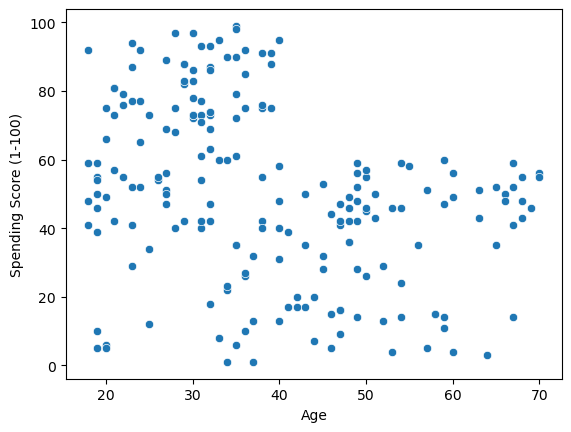

In [15]:
sns.scatterplot(data=df,x="Age",y="Spending Score (1-100)")

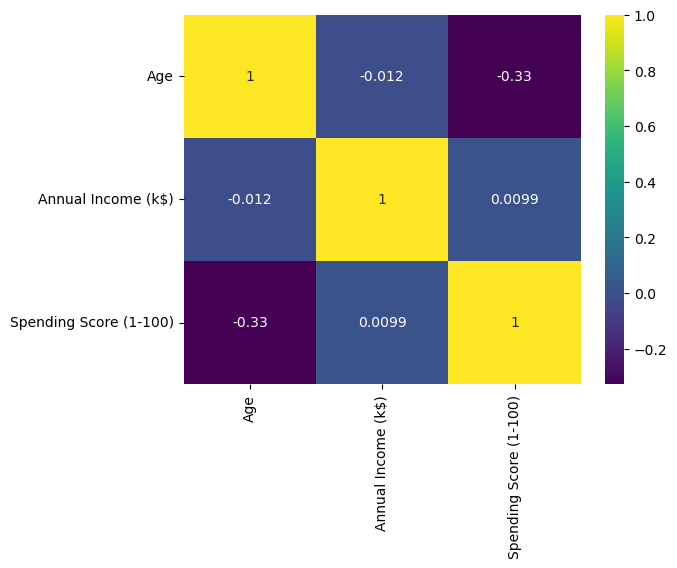

In [16]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.ylim(len(numeric_df.columns), 0)
plt.show()

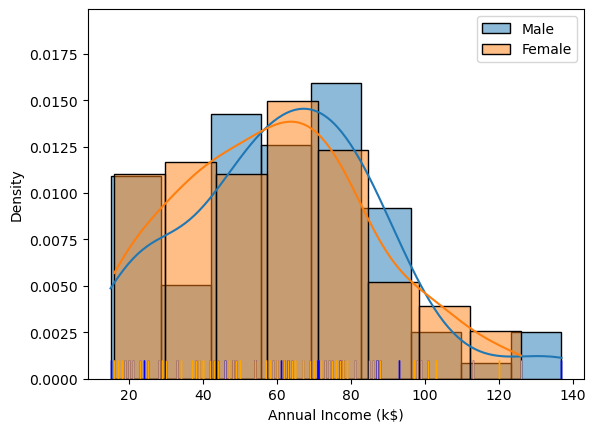

In [17]:
sns.histplot(df[df["Gender"] == "Male"]["Annual Income (k$)"], kde=True, label="Male", stat="density", alpha=0.5)
sns.histplot(df[df["Gender"] == "Female"]["Annual Income (k$)"], kde=True, label="Female", stat="density", alpha=0.5)
sns.rugplot(df[df["Gender"] == "Male"]["Annual Income (k$)"], color='blue', height=0.05)
sns.rugplot(df[df["Gender"] == "Female"]["Annual Income (k$)"], color='orange', height=0.05)
plt.legend()
plt.show()

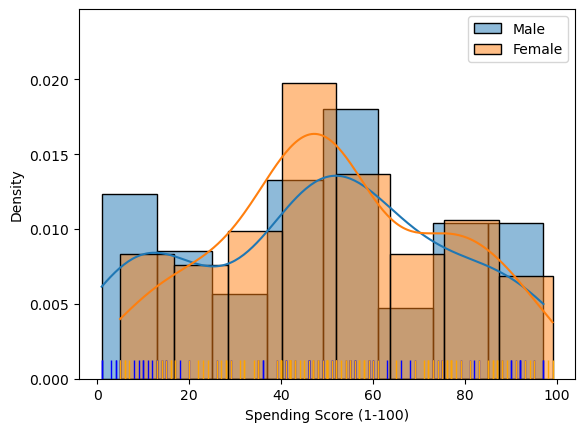

In [18]:
sns.histplot(df[df["Gender"] == "Male"]["Spending Score (1-100)"], kde=True, stat="density", label="Male", alpha=0.5)
sns.histplot(df[df["Gender"] == "Female"]["Spending Score (1-100)"], kde=True, stat="density", label="Female", alpha=0.5)
sns.rugplot(df[df["Gender"] == "Male"]["Spending Score (1-100)"], color="blue", height=0.05)
sns.rugplot(df[df["Gender"] == "Female"]["Spending Score (1-100)"], color="orange", height=0.05)
plt.legend()
plt.show()

In [19]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [20]:
dummies = pd.get_dummies(df['Gender'],drop_first=True)
df_post = pd.concat([df,dummies],axis=1)
df_post = df_post.drop(['Gender'],axis=1)

In [21]:
df_post

,Age,Annual Income (k$),Spending Score (1-100),Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
...,...,...,...,...
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True


In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
scaled_df = scaler.fit_transform(df_post)
scaled_df

array([[0.01923077, 0.        , 0.3877551 , 1.        ],
       [0.05769231, 0.        , 0.81632653, 1.        ],
       [0.03846154, 0.00819672, 0.05102041, 0.        ],
       [0.09615385, 0.00819672, 0.7755102 , 0.        ],
       [0.25      , 0.01639344, 0.39795918, 0.        ],
       [0.07692308, 0.01639344, 0.76530612, 0.        ],
       [0.32692308, 0.02459016, 0.05102041, 0.        ],
       [0.09615385, 0.02459016, 0.94897959, 0.        ],
       [0.88461538, 0.03278689, 0.02040816, 1.        ],
       [0.23076923, 0.03278689, 0.7244898 , 0.        ],
       [0.94230769, 0.03278689, 0.13265306, 1.        ],
       [0.32692308, 0.03278689, 1.        , 0.        ],
       [0.76923077, 0.04098361, 0.14285714, 0.        ],
       [0.11538462, 0.04098361, 0.7755102 , 0.        ],
       [0.36538462, 0.04098361, 0.12244898, 1.        ],
       [0.07692308, 0.04098361, 0.79591837, 1.        ],
       [0.32692308, 0.04918033, 0.34693878, 0.        ],
       [0.03846154, 0.04918033,

In [25]:
from sklearn.cluster import KMeans

In [26]:
import warnings
warnings.filterwarnings('ignore')

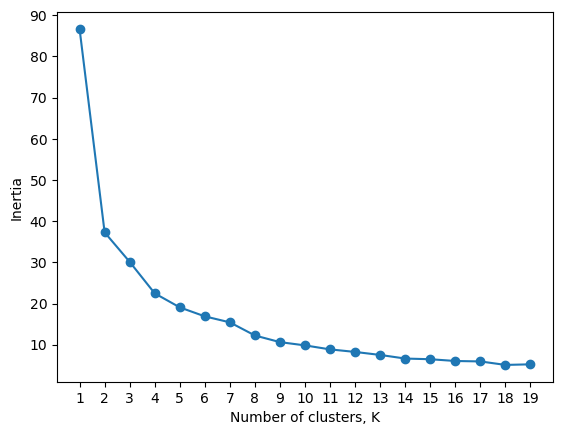

In [27]:
ks = range(1, 20)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_df)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, K')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [28]:
from sklearn.metrics import silhouette_score

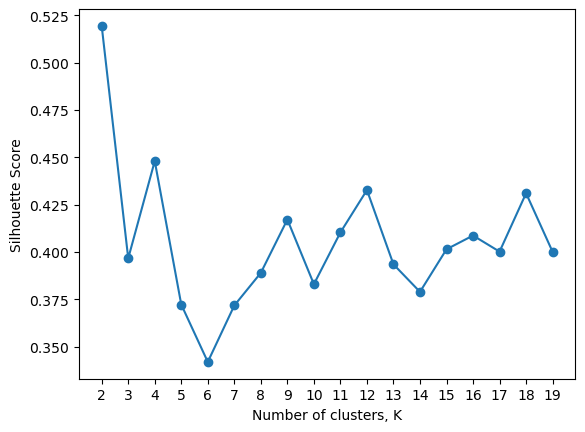

In [29]:
silhouettes = []
ks = range(2, 20)
for num_clusters in ks:
    clusterer = KMeans(n_clusters=num_clusters)
    preds = clusterer.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, preds, metric='euclidean')
    silhouettes.append(score)

plt.plot(ks, silhouettes, '-o')
plt.xlabel('Number of clusters, K')
plt.ylabel('Silhouette Score')
plt.xticks(ks)
plt.show()

In [30]:
num_clusters = 2

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [32]:
encoder = Sequential()
encoder.add(Dense(units=500,activation='relu',input_shape=[4]))
encoder.add(Dense(units=500,activation='relu',input_shape=[500]))
encoder.add(Dense(units=2000,activation='relu',input_shape=[500]))
encoder.add(Dense(units=10,activation='relu',input_shape=[2000]))

In [33]:
decoder = Sequential()
decoder.add(Dense(units=2000,activation='relu',input_shape=[10]))
decoder.add(Dense(units=500,activation='relu',input_shape=[2000]))
decoder.add(Dense(units=500,activation='relu',input_shape=[500]))
decoder.add(Dense(units=4,activation='relu',input_shape=[500]))

In [34]:
autoencoder = Sequential([encoder,decoder])

In [35]:
autoencoder.compile(loss="mse", optimizer=SGD(learning_rate=1.5))

In [36]:
encoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 500)                 │           2,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2000)                │       1,002,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          20,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,275,010 (4.86 MB)

 Trainable params: 1,275,010 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 2000)                │          22,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 500)                 │       1,000,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │           2,004 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,275,004 (4.86 MB)

 Trainable params: 1,275,004 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
autoencoder.fit(x=scaled_df,
                y=scaled_df,
                epochs=20,
                batch_size=128)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2437 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1260
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1141
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1068
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1086
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1035
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1016
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1128
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1542
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1251
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0781
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0541
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1197
Epoch 14/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1631
Epoch 15/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1565
Epoch 16/20
2/2 ━━━━━━━━━━━━━━━━━

In [39]:
kmeans = KMeans(n_clusters=num_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoder.predict(scaled_df))
y_pred

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0])

In [40]:
df["Client Segment"]=y_pred

In [41]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Client Segment
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,0
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,0
197,Male,32,126,74,0
198,Male,32,137,18,1


<Axes: xlabel='Gender', ylabel='count'>

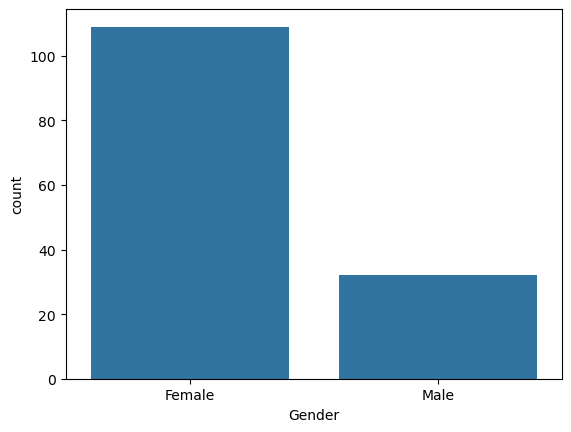

In [42]:
filtered_df=df[df["Client Segment"]==0]
sns.countplot(data=filtered_df,x=filtered_df["Gender"])

<Axes: xlabel='Gender', ylabel='count'>

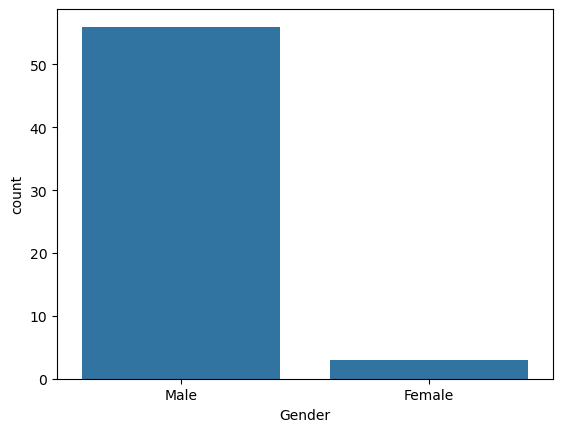

In [43]:
filtered_df=df[df["Client Segment"]==1]
sns.countplot(data=filtered_df,x=filtered_df["Gender"])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

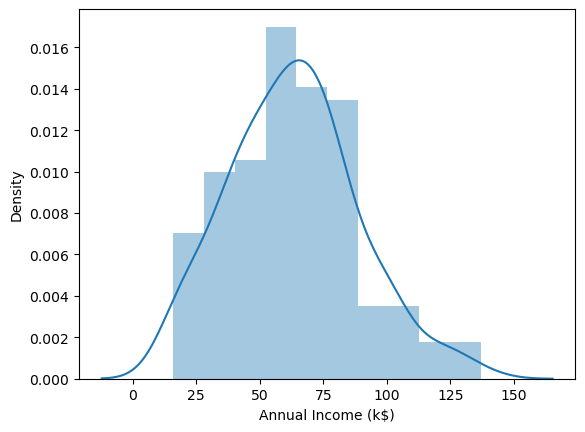

In [44]:
filtered_df=df[df["Client Segment"]==0]
sns.distplot(filtered_df["Annual Income (k$)"],norm_hist=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

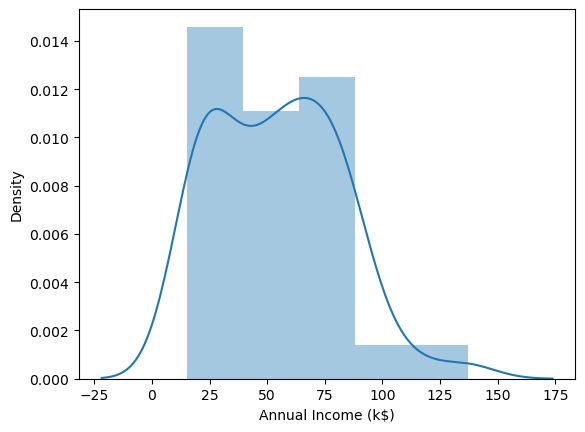

In [45]:
filtered_df=df[df["Client Segment"]==1]
sns.distplot(filtered_df["Annual Income (k$)"],norm_hist=True)

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

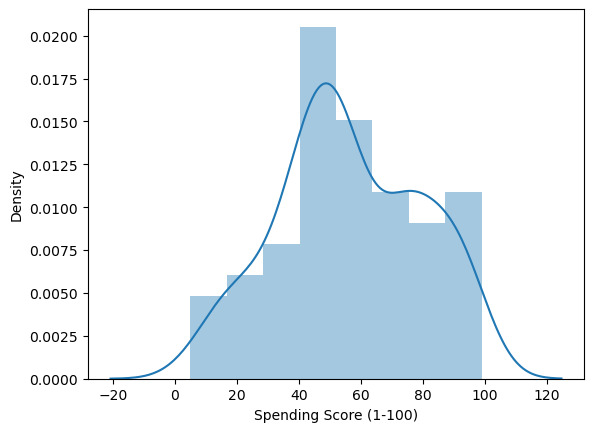

In [46]:
filtered_df=df[df["Client Segment"]==0]
sns.distplot(filtered_df["Spending Score (1-100)"],norm_hist=True)

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

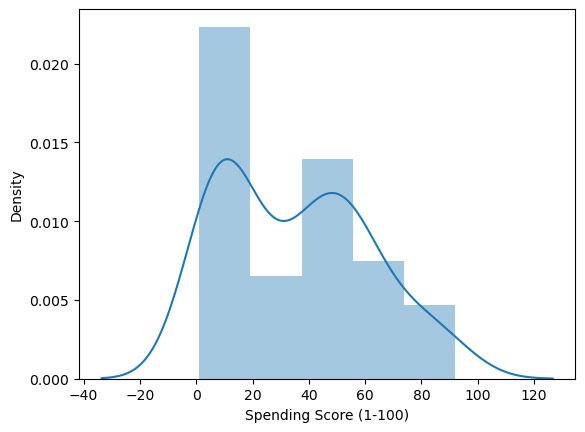

In [47]:
filtered_df=df[df["Client Segment"]==1]
sns.distplot(filtered_df["Spending Score (1-100)"],norm_hist=True)